![CC-BY-SA](https://mirrors.creativecommons.org/presskit/buttons/88x31/svg/by-sa.svg)


This notebook was created by [Bernardo Freitas Paulo da Costa](http://www.im.ufrj.br/bernardofpc),
and is licensed under Creative Commons BY-SA.

Antes de enviar este Teste, verifique que tudo está funcionando como esperado.
Por exemplo, **rode o código inteiro, do zero**.
Para isso, vá no menu, escolha _Kernel_, depois _Restart & Run All_.

Verifique, também, que você respondeu todas as questões:
* as questões de código têm `YOUR CODE HERE` (e você pode apagar o `raise NotImplemented` ao incluir sua resposta)
* as questões discursivas têm "YOUR ANSWER HERE".

---

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Calculando um autovalor qualquer

## Questão 1: Iteração inversa

Podemos calcular um autovalor da matriz $A$ próximo de $a$
ao calcular um autovalor da matriz $M = (A - aI)^{-1}$.
Observe que "multiplicar" por $M$ é equivalente a resolver o sistema linear com matriz $A - aI$,
o que permite usar `np.linalg.solve` para fazer as iterações.

Obs: note que, após calcular um par autovetor-autovalor de $M$,
será necessário fazer operações simples para converter em um par autovetor-autovalor de $A$.

In [2]:
def any_eigen(A, a, tol=1e-6):
    """
    Encontra o par autovetor-autovalor de 'A' de autovalor mais próximo de 'a'.
    Retorna, também, o número de iterações.
    """
    n,m = np.shape(A)
    assert n==m, 'A must be square'
    u = np.random.rand(n)
    
    def norma(u): return np.linalg.norm(u)
    def normalizar(u): return u/np.linalg.norm(u)
    
    u = v = w = normalizar(u)     
    k = 0                         
    e = tol+1.                    
    B = A - (a*np.identity(n))       
    
    while True:
        if k == 100: break   ## Condição aplicada apenas para conseguir gerar o gráfico da questão 3 ##
        if e <= tol: break
        k += 1               

        v = np.linalg.solve(B,u)   
        μ = np.dot(u,v)            # autovalor de M
        
        w = normalizar(v)          
        e = norma(u - w)           # erro
        u = w                      # autovetor (aproximado)
    return u , a + 1. / μ , k

In [3]:
A = np.array([[125,5],[0,300]])
u, l, n = any_eigen(A, 234.567)
assert np.allclose(A@u, l*u, rtol=1e-4)

In [4]:
A = np.array([[125,5],[0,300]])
u, l, n = any_eigen(A, 234.567, tol=1e-8)
assert np.allclose(A@u, l*u, rtol=1e-6)

In [5]:
A = np.array([[125,5],[0,300]])
u, l, n = any_eigen(A, 234.567, tol=1e-10)
assert np.allclose(A@u, l*u, rtol=1e-8)

Qual o erro entre $Au$ e $\lambda u$?
Como você explica isso, dadas as tolerâncias?

Observa-se pelos asserts que o erro é inferior a 1e-8, isso se da pois em cada um dos asserts a função é chamada pedindo uma tolerância menor do que a do próprio teste do assert e, estamos utilizando como chute inicial 234.567, um número bem próximo de um dos autovalores da matriz, o que faz a função convergir com poucas iterações para o autovalor mais próximo ao chute.

In [6]:
np.random.seed(99)
u1, l1, n1 = any_eigen(A, 234.567, tol=1e-8)
u2, l2, n2 = any_eigen(A, 234.567, tol=1e-8)
assert np.allclose(u1, u2)
assert np.isclose(l1, l2)
print(n1, n2)

39 44


Explique os testes e o `print` da caixa acima.

O primeiro teste verifica se rodando 2 vezes a função usando os mesmo argumentos resulta no mesmo autovetor.

O segundo teste também verifica se a função rodada 2 vezes (dados os mesmos argumentos) resulta no mesmo autovalore.

E o print final é o número de iterações realizadas em cada uma das vezes que a função foi rodada, e a diferença nos valores é devido ao fato de que inicialmente a função usa um autovetor aleatório, fazendo com que a cada vez que a função for chamada exista uma quantidade necessária de iterações diferentes para chegar ao mesmo resultado.

## Questão 2: Velocidade de convergência I

Faça um gráfico do número de iterações necessários, em função da tolerância,
para encontrar o autovalor mais próximo de 234.567 da matriz

$$ A = \begin{bmatrix} 125 & 5 \\ 0 & 300 \end{bmatrix}. $$

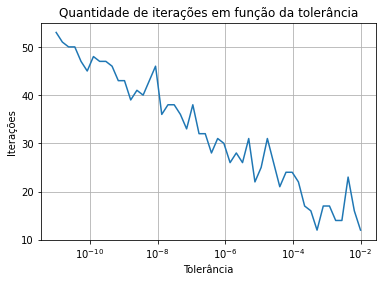

In [7]:
tols = np.logspace(-2, -11, num=50)
ns = [any_eigen(A, 234.567, i)[2] for i in tols]

plt.semilogx(tols, ns)
plt.title('Quantidade de iterações em função da tolerância')
plt.xlabel('Tolerância')
plt.ylabel('Iterações')
plt.grid()

ax = plt.gca();

In [8]:
assert len(ax.lines) == 1
assert ax.get_xlabel() != ""
assert ax.get_ylabel() != ""

In [9]:
l = ax.lines[0]
xs = l.get_xdata()
ys = l.get_ydata()
assert min(xs) < 1e-10 < 1e-3 < max(xs)
assert 2 < min(ys) < 20 < max(ys) < 100

In [10]:
ax = None

O que você observa do gráfico?

Observando o comportamento com o eixo x em escala log (para se adequar à escala da tolerância) pode-se perceber que o número de iterações decai quase linearmente (proporcional) conforme a tolerância aumenta.

## Questão 3: Velocidade de convergência II

Agora, considere diferentes "chutes" para os autovalores de $A$ entre 1 e 1000,
e faça um gráfico com as velocidades de convergência para todos eles.

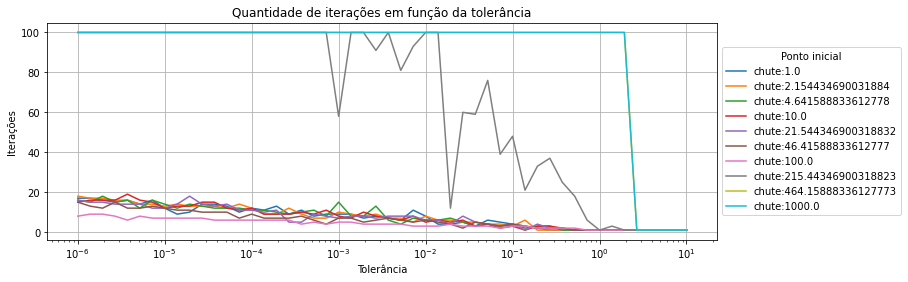

In [11]:
plt.figure(figsize=(12,4))
chutes = np.logspace(0, 3, num=10)

tols = np.logspace(1, -6, num=50)

for chute in chutes:
    ns = [any_eigen(A, chute, i)[2] for i in tols]
    plt.semilogx(tols, ns, label=f'chute:{chute}')

plt.title('Quantidade de iterações em função da tolerância')
plt.xlabel('Tolerância')
plt.ylabel('Iterações')
plt.legend(title="Ponto inicial", loc="center left", bbox_to_anchor=(1.0, 0.5))
plt.grid()

ax = plt.gca();

In [12]:
assert len(ax.lines) == 10
assert ax.get_title() != ""

In [13]:
ax = None

O que você percebe no gráfico anterior?
Se necessário, faça outro gráfico, ou outras contas.

Percebe-se que conforme o 'chute' vai ficando cada vez mais distante do autovalor, mais iterações são necessárias.

OBS: Devido ao fato de o computador demorar demais nos 2 últimos chutes, apliquei a tolerância entre 1e-6 e 1e1, e como já observado no código, apliquei uma condição que limita o número de iterações para 100 afim de conseguir observar o que estava ocorrendo.

## Questão 4: Velocidade de convergência III

Agora, considere as matrizes:

$$ \begin{align*}
A_x  & = \begin{bmatrix} 125 & x \\ 0 & 300 \end{bmatrix} \\
\end{align*} $$

com $x$ variando entre $1$ e $1000$.

Quais são os autovalores destas matrizes?

Os mesmos, idependente do valor de x, que são: 125 e 300.  
Isso se dá pois em matrizes triangulares, os seus autovalores são sempre os coeficientes da sua diagonal.

Faça um gráfico do número de iterações em função da tolerância, sempre começando de 234.567,
para as várias matrizes $A_x$.

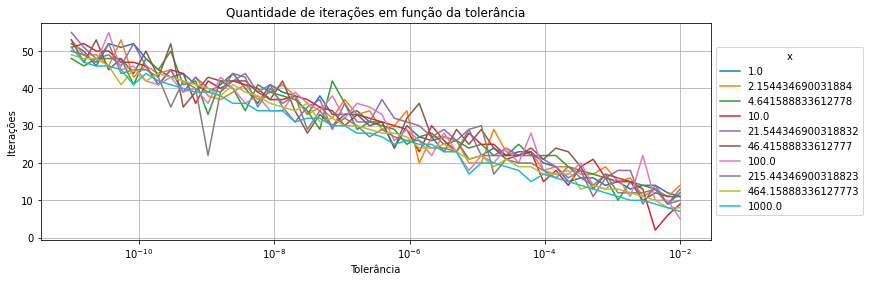

In [14]:
plt.figure(figsize=(12,4))

valores_x = np.logspace(0, 3, num=10)
tols = np.logspace(-2, -11, num=50)

for x in valores_x:
    A = np.array([[125,x],[0,300]]) 
    ns = [any_eigen(A, 234.567, i)[2] for i in tols]
    plt.semilogx(tols, ns, label=f'{x}')

plt.title('Quantidade de iterações em função da tolerância')
plt.xlabel('Tolerância')
plt.ylabel('Iterações')
plt.legend(title="x", loc="center left", bbox_to_anchor=(1.0, 0.5))
plt.grid()

ax = plt.gca();

In [15]:
assert len(ax.lines) >= 10
assert ax.get_title() != ""

In [16]:
ax = None

O que mudou?
Porquê você acha que isso acontece?

Pode-se perceber que de fato (como já visto antes), mudar o valor do 'chute incial' implica bastante nas iterações necessárias para se atingir uma certa precisão, porém, alterar um valor da diagonal não causa tanta diferença. Analisando o gráfico acima percebe-se que, em média, quanto maior o valor de x, menos iterações são necessárias para se atingir a tolerância solicitada.